# Lesson 3: [Basic Python for Data Analytics (Stocks Prediction)](https://github.com/VincentTatan/PythonAnalytics/blob/master/Youtube/Lesson%203%20%20Basic%20Python%20for%20Data%20Analytics%20%28Stocks%20Prediction%29.ipynb)

# Introduction of Pandas


pandas is a DataFrame Framework, a library that stores data in a highly efficient spreadsheet format and functions.
Efficient in:
1. Data Structure (numpy)
2. Computing time (since DataFrame is processed by C++, it runs in a well streamlined computing environment)
3. Highly optimized and updated processes


[For more details of numpy](https://en.wikipedia.org/wiki/NumPy)

[For more details of pandas cookbook and 10 minutes basic](http://pandas.pydata.org/pandas-docs/stable/10min.html)

## Objective

* To use pandas to load the latest updated data from Yahoo Finance
* To explore and understand the dataset 
    * Viewing the data
    * Correlation Analysis
    * Graphing using matplotlib
* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)
* Comparing models and discuss improvements
* Challenges:
    * Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
    * Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
    * Cleaning out the data
    * Importing data files
* Next lesson:
    * Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)

## Loading YahooFinance Dataset

In this demonstration, we will use pandas web data reader. This is an extension of pandas library to communicate with most updated financial data. 

This will include sources as:
* Yahoo! Finance
* Google Finance
* Enigma
* FRED
* Fama/French
* World Bank
* OECD
* Eurostat
* EDGAR Index
* TSP Fund Data
* Oanda currency historical rate
* Nasdaq Trader Symbol Definitions

[For more details of pandas webreader](https://pandas-datareader.readthedocs.io/en/latest/)  

In [48]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-30,153.490005,148.610001,149.000000,153.119995,90956700.0,153.119995
2021-08-31,152.800003,151.289993,152.660004,151.830002,86453100.0,151.830002
2021-09-01,154.979996,152.339996,152.830002,152.509995,80313700.0,152.509995
2021-09-02,154.720001,152.399994,153.869995,153.649994,71115500.0,153.649994
2021-09-03,154.630005,153.089996,153.759995,154.300003,57808700.0,154.300003


Get the dimension of dataframe

In [49]:
df.shape

(2940, 6)

## Exploring the data 

First we will need to explore the data.
This means understanding the stocks data trend thoroughly by finding key measures
* rolling mean (moving average) -- to determine trend
* return deviation -- to determine return deviation

[For more details of rolling mean](http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp) 


In [50]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2021-08-23    135.483963
2021-08-24    135.754086
2021-08-25    135.982701
2021-08-26    136.200026
2021-08-27    136.411105
2021-08-30    136.642862
2021-08-31    136.835404
2021-09-01    137.052289
2021-09-02    137.248776
2021-09-03    137.475687
Name: Adj Close, dtype: float64

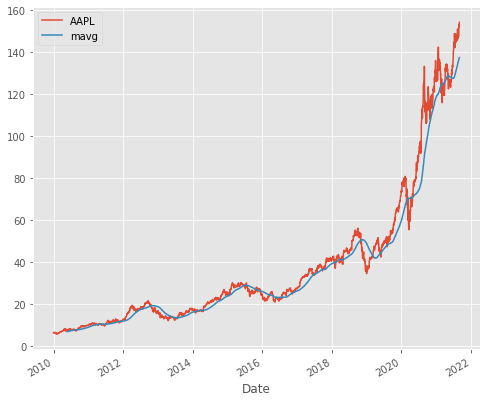

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [52]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()

Date
2009-12-31         NaN
2010-01-04    0.015565
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

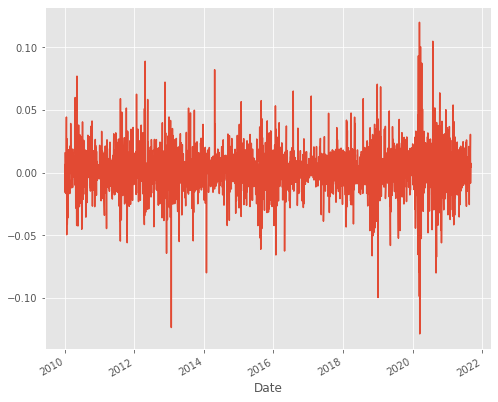

In [55]:
rets.plot(label="return")

## Doing the competitor analysis/Correlation

1. How does one company perform in relative with its competitor
2. What are the correlations among these companies

In [56]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2021-08-30,153.119995,105.190002,2909.389893,138.970001,303.589996
2021-08-31,151.830002,105.410004,2909.239990,140.339996,301.880005
2021-09-01,152.509995,103.660004,2916.840088,139.300003,301.829987
2021-09-02,153.649994,106.260002,2884.379883,140.009995,301.149994
2021-09-03,154.300003,104.750000,2895.500000,139.580002,301.140015


Get the dimension of dataframes

In [57]:
dfcomp.shape

(2940, 5)

In [58]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.328725,0.527875,0.415023,0.563031
GE,0.328725,1.000000,0.341546,0.501494,0.360820
GOOG,0.527875,0.341546,1.000000,0.442729,0.613071
IBM,0.415023,0.501494,0.442729,1.000000,0.508236
MSFT,0.563031,0.360820,0.613071,0.508236,1.000000


Text(0, 0.5, 'Returns GE')

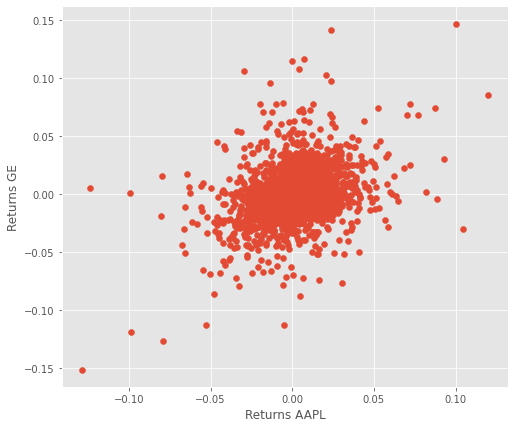

In [59]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

You can do scatter matrix with all the competitors data and find the kde of each m
KDE will determine if your chart is more normally distributed leaning to the 
* left: Returns are more likely to be negative in the long run
* centre: Returns are more likely to be 0 in the long run
* right: Returns are more likely to be positive in the long run

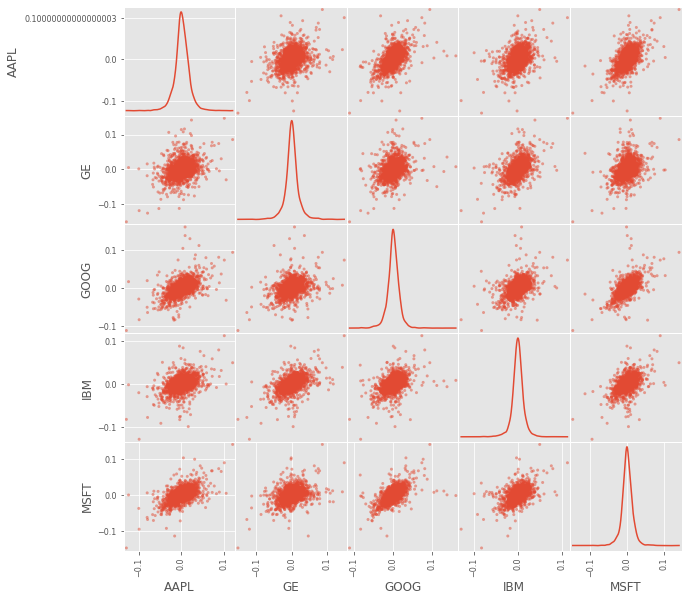

In [61]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

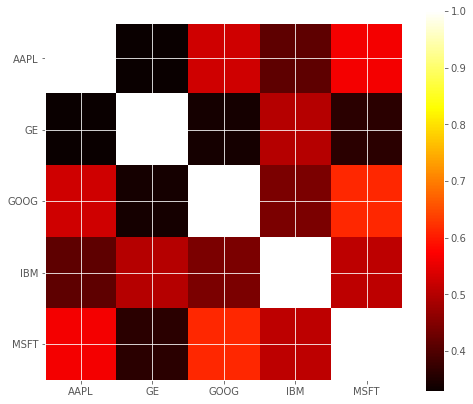

In [62]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## Stocks mean and Risk calculation
Which stocks are risky and bearing returns

Kurtosis and skewness

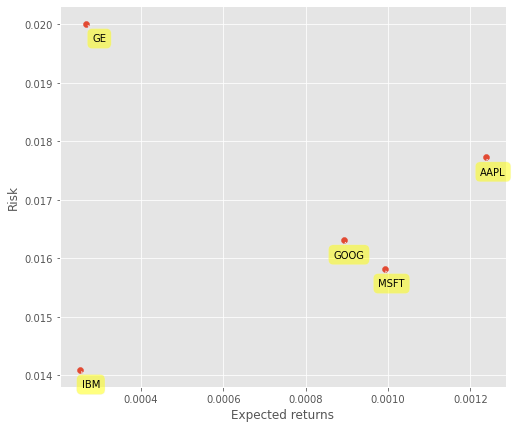

In [63]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting the stocks price

To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [64]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [118]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-08-30,153.119995,90956700.0,3.187046,2.765097
2021-08-31,151.830002,86453100.0,0.994540,-0.543693
2021-09-01,152.509995,80313700.0,1.731034,-0.209388
2021-09-02,153.649994,71115500.0,1.509930,-0.142979
2021-09-03,154.300003,57808700.0,0.998061,0.351202


In [119]:
import math
import numpy as np
from sklearn import preprocessing, model_selection, svm


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
print('--- dfreg -------------')
display(dfreg.tail())
print('dfreg.shape',dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
print('forecast_out',forecast_out)
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

--- dfreg -------------


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-08-30,153.119995,90956700.0,3.187046,2.765097
2021-08-31,151.830002,86453100.0,0.994540,-0.543693
2021-09-01,152.509995,80313700.0,1.731034,-0.209388
2021-09-02,153.649994,71115500.0,1.509930,-0.142979
2021-09-03,154.300003,57808700.0,0.998061,0.351202


dfreg.shape (2940, 4)
forecast_out 30
Dimension of X (2910, 4)
Dimension of y (2910,)


/tmp/ipykernel_23143/734854990.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(dfreg.drop(['label'], 1))
/opt/conda/envs/feast-conda-env/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [122]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)


# Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

## Build the model

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

## Test the model

In [124]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.9766575927383945
The quadratic regression 2 confidence is  0.9768240695965725
The quadratic regression 3 confidence is  0.9785836635035733
The knn regression confidence is  0.9728938348643683


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times. 

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind. 

We need to plot out the graph to make the most sense of it 

In [114]:
# Printing the forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)
print('X_lately',X_lately)

[-9.42395265e+03 -1.16677291e+04 -1.09313481e+04 -1.12101353e+04
 -1.16933283e+04 -9.70780292e+07 -9.70780292e+07 -9.70780292e+07
 -9.70780292e+07 -9.70780292e+07 -9.70780292e+07 -9.70780292e+07
 -9.70780292e+07 -9.70780292e+07 -9.70780292e+07 -9.70780292e+07
 -9.70780292e+07 -9.70780292e+07 -9.70780292e+07 -9.70780292e+07
 -1.16932969e+08 -1.16932779e+08 -1.16932895e+08 -1.16933127e+08
 -1.16933267e+08] -0.04419548399981199 25
X_lately [[  0.09654508  -0.80324981   0.08262808   0.08281343  -0.0411345 ]
 [  0.09638767  -0.82306886   0.08236045   0.08240953  -0.0411345 ]
 [  0.09647065  -0.85008659   0.08245035   0.08245034  -0.0411345 ]
 [  0.09660975  -0.89056522   0.08242336   0.08245845  -0.0411345 ]
 [  0.09668907  -0.94912462   0.08236088   0.08251877  -0.0411345 ]
 [-12.12425225  -1.20396413 -12.12435552 -12.12435549  -0.0411345 ]
 [-12.12425225  -1.20396413 -12.12435552 -12.12435549  -0.0411345 ]
 [-12.12425225  -1.20396413 -12.12435552 -12.12435549  -0.0411345 ]
 [-12.12425225 

# Plotting the Prediction

In [125]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
print(last_date)

2021-09-03 00:00:00


KeyError: 'Forecast'

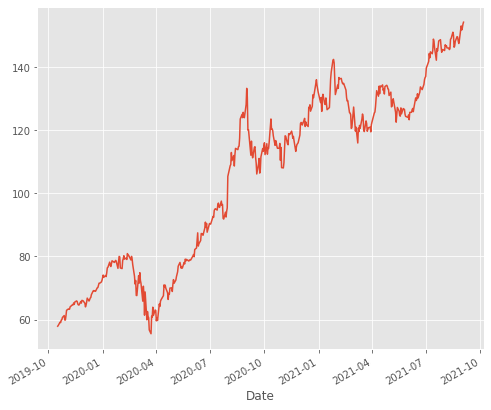

In [126]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Challenges (To Be Continued):
* Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
* Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
* Cleaning out the data
* Importing data files

# Next lesson:
## Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)